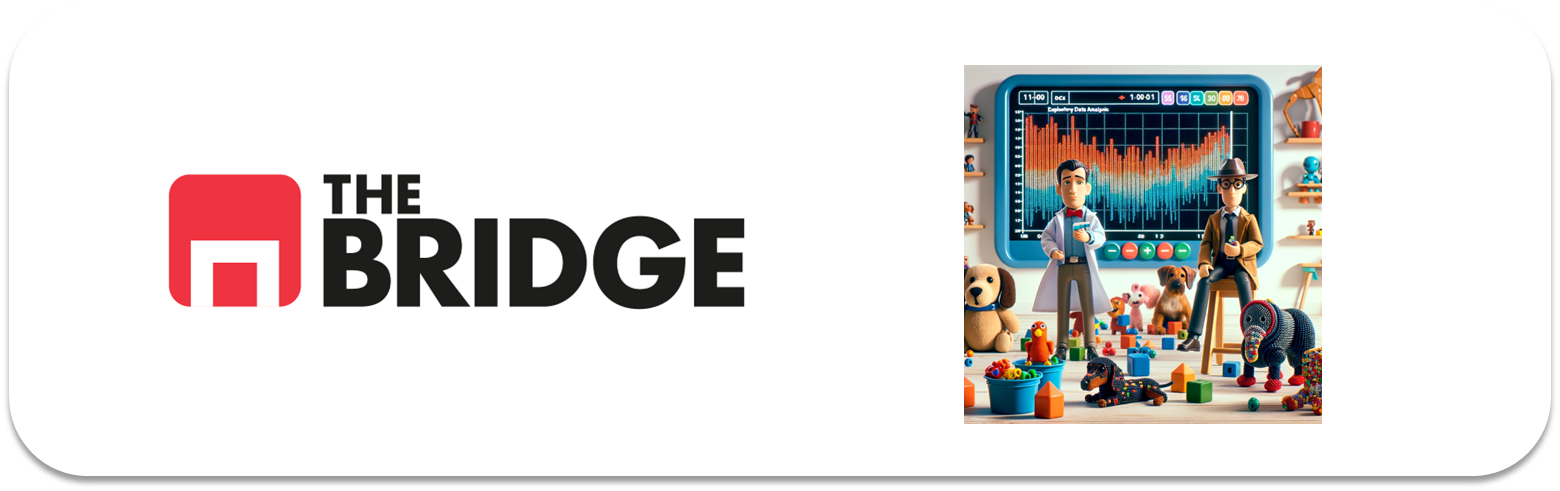

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [15]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [16]:
columnas_a_eliminar = ["deck", "survived", "pclass", "embarked"]
df_titanic = df_titanic.drop(columns=columnas_a_eliminar)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [17]:
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


In [19]:
df_titanic['family_members'] = df_titanic['parch'] + df_titanic['sibsp']
df_titanic.head()



,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0


In [20]:
df_titanic = df_titanic.drop(columns=['parch', 'sibsp'])
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [24]:
df_titanic['embark_town'].isnull().sum()



np.int64(0)

In [25]:
moda_embark_town = df_titanic['embark_town'].mode()[0]
df_titanic['embark_town'] = df_titanic['embark_town'].fillna(moda_embark_town)
df_titanic['embark_town'].isnull().sum()

np.int64(0)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [28]:
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].mean())
print(df_titanic['age'])
df_titanic['age'].isnull().sum()

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64


np.int64(0)

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

who    alive
child  yes       49
       no        34
man    no       449
       yes       88
woman  yes      205
       no        66
Name: count, dtype: int64
who    alive
child  yes      0.590361
       no       0.409639
man    no       0.836127
       yes      0.163873
woman  yes      0.756458
       no       0.243542
Name: proportion, dtype: float64


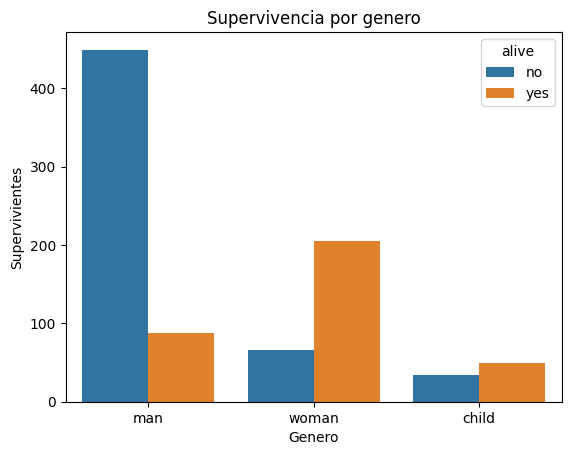

In [39]:
1#

print(df_titanic.groupby("who")["alive"].value_counts())

print(df_titanic.groupby("who")["alive"].value_counts(True))

sns.countplot(data=df_titanic,x="who",hue="alive")
plt.title("Supervivencia por genero")
plt.xlabel("Genero")
plt.ylabel("Supervivientes")
plt.show()

En terminos absolutos, sobrevivieron más mujeres, luego hombres y por último niños. Sin embargo en terminos relativos sobrevivieron más mujeres, luego niños y por último adultos.

Si que hay relación entre la clase y la supervivencia, seguramente esté marcado por no haber suficientes botes salvavidas y que evacuaran primero a mujeres y niños

class   alive
First   yes      136
        no        80
Second  no        97
        yes       87
Third   no       372
        yes      119
Name: count, dtype: int64
class   alive
First   yes      0.629630
        no       0.370370
Second  no       0.527174
        yes      0.472826
Third   no       0.757637
        yes      0.242363
Name: proportion, dtype: float64


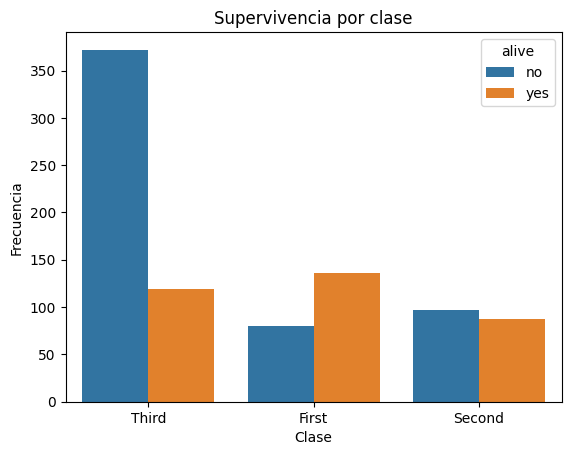

In [37]:
2#
print(df_titanic.groupby("class")["alive"].value_counts())

print(df_titanic.groupby("class")["alive"].value_counts(normalize=True))

sns.countplot(data=df_titanic, x="class", hue="alive")
plt.title("Supervivencia por clase")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

Vemos que claramente la 3 clase es la más perjudicada respecto a la relación supervivientes/clase


embark_town  alive
Cherbourg    yes       93
             no        75
Queenstown   no        47
             yes       30
Southampton  no       427
             yes      219
Name: count, dtype: int64
embark_town  alive
Cherbourg    yes      0.553571
             no       0.446429
Queenstown   no       0.610390
             yes      0.389610
Southampton  no       0.660991
             yes      0.339009
Name: proportion, dtype: float64


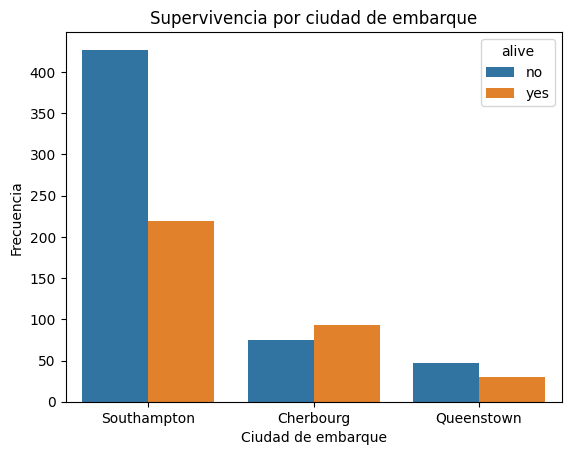

In [40]:
3#
print(df_titanic.groupby("embark_town")["alive"].value_counts())

print(df_titanic.groupby("embark_town")["alive"].value_counts(normalize=True))

sns.countplot(data=df_titanic, x="embark_town", hue="alive")
plt.title("Supervivencia por ciudad de embarque")
plt.xlabel("Ciudad de embarque")
plt.ylabel("Frecuencia")
plt.show()

En este caso la ciudad de embarque de Southampton fue la más perjudicada

       count       mean        std  min      25%   50%   75%       max
alive                                                                 
no     549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
yes    342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


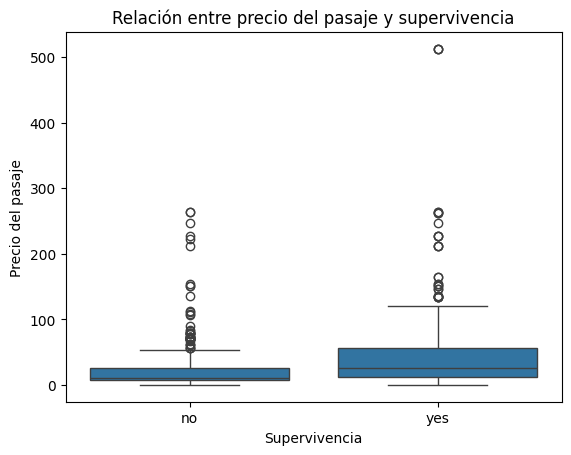

In [41]:
4#
print(df_titanic.groupby("alive")["fare"].describe())

sns.boxplot(data=df_titanic, x="alive", y="fare")
plt.title("Relación entre precio del pasaje y supervivencia")
plt.xlabel("Supervivencia")
plt.ylabel("Precio del pasaje")
plt.show()

Vemos que el precio si es un factor que tuvo relevancia, seguramente los pasajes con precios más altos estaban mejor posicionados y también fueron considerados antes para el rescate

In [42]:
5#
no_pago = df_titanic[df_titanic["fare"] == 0]
print("Pasajeros que no pagaron el billete:")
print(no_pago[["alive", "embark_town", "class", "who"]])

max_fare = df_titanic[df_titanic["fare"] == df_titanic["fare"].max()]
print("\nPasajero con el billete más caro:")
print(max_fare[["alive", "embark_town", "class", "who", "fare"]])


Pasajeros que no pagaron el billete:
    alive  embark_town   class  who
179    no  Southampton   Third  man
263    no  Southampton   First  man
271   yes  Southampton   Third  man
277    no  Southampton  Second  man
302    no  Southampton   Third  man
413    no  Southampton  Second  man
466    no  Southampton  Second  man
481    no  Southampton  Second  man
597    no  Southampton   Third  man
633    no  Southampton   First  man
674    no  Southampton  Second  man
732    no  Southampton  Second  man
806    no  Southampton   First  man
815    no  Southampton   First  man
822    no  Southampton   First  man

Pasajero con el billete más caro:
    alive embark_town  class    who      fare
258   yes   Cherbourg  First  woman  512.3292
679   yes   Cherbourg  First    man  512.3292
737   yes   Cherbourg  First    man  512.3292


Los pasajeros que no pagaron, seguramente tendrían alguna invitación al ser personas influyentes, ya que hay en primera clase y también es posible que se incluiran algunos trabajadores, alojados en 2 y 3 clase. 
En cuanto al billete más caro, sobrevivieron. Lo más probable es que tuvieran un lugar privilegiado. 

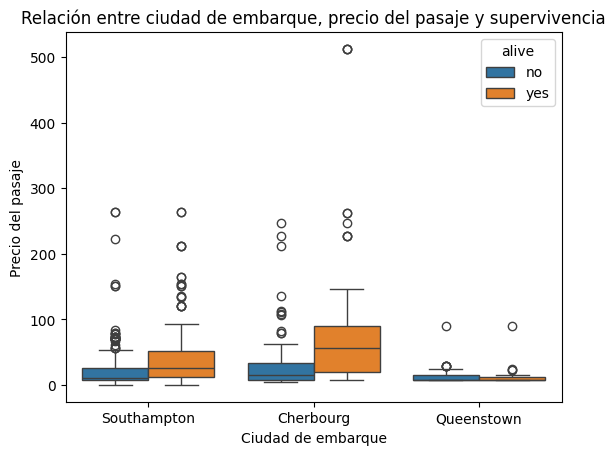

In [43]:
6#
sns.boxplot(data=df_titanic, x="embark_town", y="fare", hue="alive")
plt.title("Relación entre ciudad de embarque, precio del pasaje y supervivencia")
plt.xlabel("Ciudad de embarque")
plt.ylabel("Precio del pasaje")
plt.show()


Supervivencia por clase y grupo de edad:
class   age_group    alive
First   Child        yes        3
                     no         1
        Teen         yes       11
                     no         1
        Young Adult  yes       64
                     no        32
        Adult        yes       55
                     no        35
        Senior       no        11
                     yes        3
Second  Child        yes       17
        Teen         no         6
                     yes        6
        Young Adult  no        60
                     yes       45
        Adult        no        29
                     yes       18
        Senior       no         2
                     yes        1
Third   Child        no        28
                     yes       20
        Teen         no        33
                     yes       13
        Young Adult  no       254
                     yes       80
        Adult        no        53
                     yes        5
        Senior

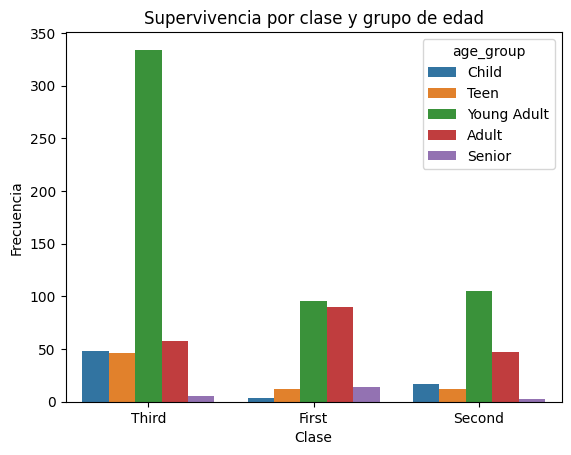

In [47]:
7#
df_titanic["age_group"] = pd.cut(
    df_titanic["age"], bins=[0, 12, 18, 35, 60, 100], 
    labels=["Child", "Teen", "Young Adult", "Adult", "Senior"]
)

print("Supervivencia por clase y grupo de edad:")
print(df_titanic.groupby(["class", "age_group"], observed=True)["alive"].value_counts())

sns.countplot(data=df_titanic, x="class", hue="age_group", dodge=True)
plt.title("Supervivencia por clase y grupo de edad")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()


Vemos que los adultos jóvenes son el grupo que más sobrevivió. Posiblemente por las mejores condiciones físicas y de salud, acentuado en la 3 clase.

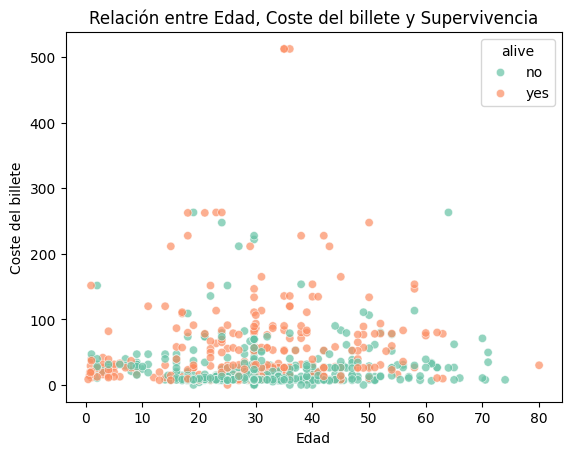

In [50]:
8#
sns.scatterplot(data=df_titanic, x="age", y="fare", hue="alive", alpha=0.7, palette="Set2")
plt.title("Relación entre Edad, Coste del billete y Supervivencia")
plt.xlabel("Edad")
plt.ylabel("Coste del billete")
plt.show()



Aqui vemos en primer lugar que los niños sobrevivieron en mayor proporcion, por lo que hemos comentado antes de evacuarlos primero
Los pasajeros que pagaron tarifas más altas también tenian mayor probabilidad de sobrevivir

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [52]:
df_junio = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_junio.head(10)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
5,MoldaviAir,Cádiz,Melbourne,20029,Boeing 737,True,53148.153240,1721,728045.68,Mol_CaMe_10737,Jun23
6,MoldaviAir,París,Londres,344,Airbus A320,False,915.246400,44,13805.52,Mol_PaLo_11320,Jun23
7,PamPangea,París,Melbourne,16925,Airbus A380,True,217722.658400,1328,1056735.47,Pam_PaMe_11380,Jun23
8,PamPangea,Nueva York,Bali,16589,Boeing 737,True,45277.618464,1459,600836.96,Pam_NuBa_10737,Jun23
9,Airnar,Ginebra,Cádiz,1725,Airbus A380,False,20339.820000,135,110108.07,Air_GiCa_11380,Jun23



Número de viajes por compañía aérea:
aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64

Ingresos por compañía aérea:
            count           mean            std       min          25%  \
aircompany                                                               
Airnar      100.0  405293.978200  269583.848420  14232.65  185270.6000   
FlyQ        108.0  401619.008056  295633.712828  23498.34  237556.9525   
MoldaviAir  133.0  548077.209098  374577.838426  11797.85  178872.9000   
PamPangea   117.0  478417.048718  364458.092328  12383.21  163124.5300   
TabarAir    142.0  271042.230282  177006.035877  24289.53   95620.5075   

                   50%          75%         max  
aircompany                                       
Airnar      396764.220  608356.1225   958617.02  
FlyQ        366970.685  473901.4325  1081702.91  
MoldaviAir  532426.220  794055.4100  1295515.83  
PamPangea   442668.520  763079.0200 

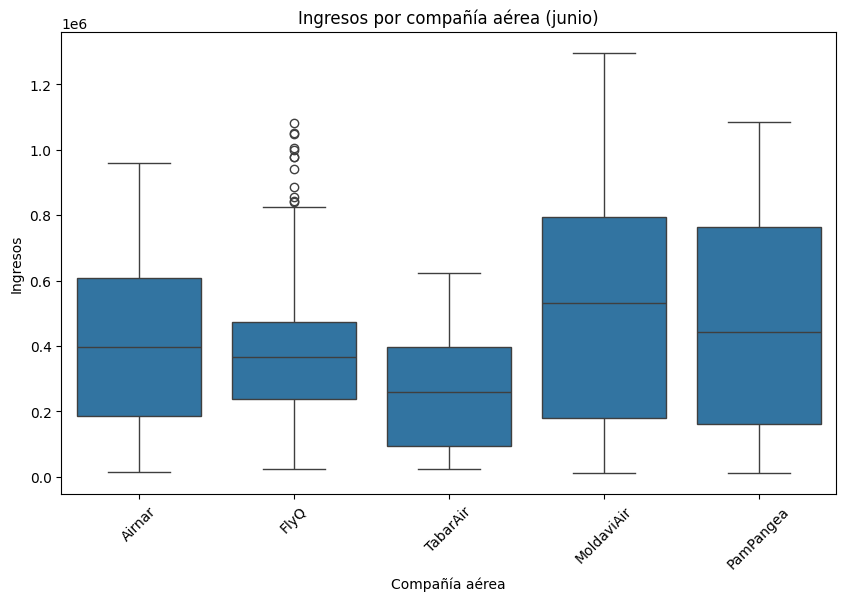

In [57]:
print("\nNúmero de viajes por compañía aérea:")
print(df_junio["aircompany"].value_counts())

print("\nIngresos por compañía aérea:")
print(df_junio.groupby("aircompany")["ingresos"].describe())

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_junio, x="aircompany", y="ingresos")
plt.title("Ingresos por compañía aérea (junio)")
plt.xlabel("Compañía aérea")
plt.ylabel("Ingresos")
plt.xticks(rotation=45)
plt.show()

Nos ha surgido la llamativa situación que pese a liderar el mercado en cuanto a viajes realizados, somos la compñía que menos ingresos ha obtenido. a no ser que se trate de una estrategia de mercado para captar clientes, nos deja en una situación para el análisis de precios y tarifas más exhaustivo. 

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

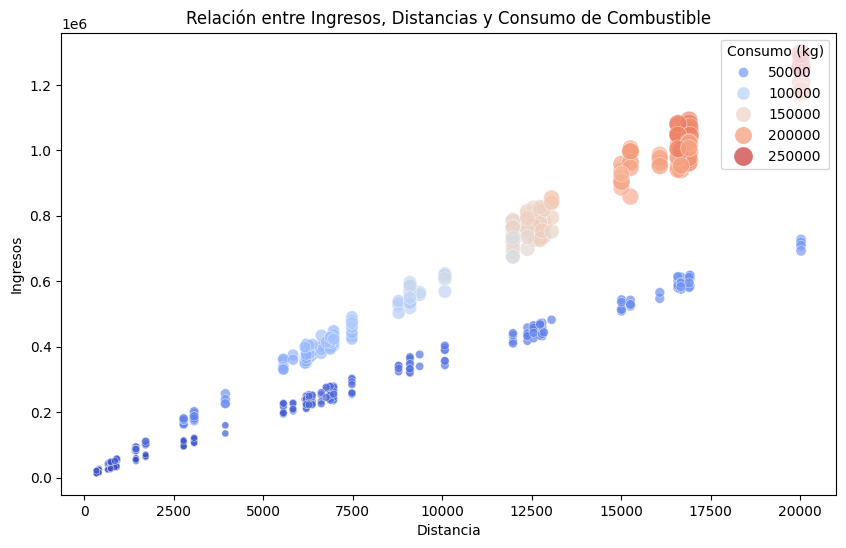


Estadísticas descriptivas de las variables:
           ingresos     distancia     consumo_kg
count  6.000000e+02    600.000000     600.000000
mean   4.187689e+05   8071.003333   68240.520508
std    3.182858e+05   5550.244086   67441.849592
min    1.179785e+04    344.000000     835.920000
25%    1.627668e+05   3073.000000   15733.520400
50%    3.754817e+05   6877.000000   36033.998000
75%    6.188420e+05  12553.000000  111717.652800
max    1.295516e+06  20029.000000  264876.314560

Correlación entre ingresos, distancia y consumo:
            ingresos  distancia  consumo_kg
ingresos    1.000000   0.928833    0.944875
distancia   0.928833   1.000000    0.762341
consumo_kg  0.944875   0.762341    1.000000


In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_junio, x="distancia", y="ingresos", size="consumo_kg", sizes=(20, 200),
                hue="consumo_kg", palette="coolwarm", alpha=0.7)
plt.title("Relación entre Ingresos, Distancias y Consumo de Combustible")
plt.xlabel("Distancia")
plt.ylabel("Ingresos")
plt.legend(title="Consumo (kg)", loc="upper right")
plt.show()

print("\nEstadísticas descriptivas de las variables:")
print(df_junio[["ingresos", "distancia", "consumo_kg"]].describe())

print("\nCorrelación entre ingresos, distancia y consumo:")
print(df_junio[["ingresos", "distancia", "consumo_kg"]].corr())



Parece como prometedor los vuelos de larga distancia, ya que a pesar del mayor consumo de combustible, también lo son los ingresos y parece un punto clave donde centrar los esfuerzos para optimizar estas rutas. 

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [66]:
print("Estadísticas descriptivas de 'distancia':")
print(df_junio["distancia"].describe())

bins = [0, 3000, 7000, 12000, df_junio["distancia"].max()]
labels = ["Corto", "Medio", "Largo", "Muy Largo"]

df_junio["cat_vuelo"] = pd.cut(df_junio["distancia"], bins=bins, labels=labels, include_lowest=True)


print("\nDistribución de categorías en 'cat_vuelo':")
print(df_junio["cat_vuelo"].value_counts())

Estadísticas descriptivas de 'distancia':
count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

Distribución de categorías en 'cat_vuelo':
cat_vuelo
Muy Largo    184
Medio        180
Corto        146
Largo         90
Name: count, dtype: int64


### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.